### Heart Failure Prediction Dataset

11 clinical features for predicting heart disease events.The data set consists of 918 observations.

Tackling a supervised learning task; Classification with tree based models; 
EDA to get a first overview and cleaning of data;



*Background*

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. (WHO)[https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1]



*Citation* data set

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [26 June 2024] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [5]:
# %pip install plotly seaborn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('heart.csv', na_values="?")

##### Attribute Information

Categorical:
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Numerical:
- Age: age of the patient [years]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]

Target variable:
- HeartDisease: output class [1: heart disease, 0: Normal]

#### EDA

In [4]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
for column in df.columns:
    distinct_sum = df.groupby(column)[column].count()
    print(distinct_sum.head().nlargest())

Age
32    5
29    3
31    2
28    1
30    1
Name: Age, dtype: int64
Sex
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingBP
95    6
94    2
0     1
80    1
92    1
Name: RestingBP, dtype: int64
Cholesterol
0      172
100      2
85       1
110      1
113      1
Name: Cholesterol, dtype: int64
FastingBS
0    704
1    214
Name: FastingBS, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
MaxHR
60    1
63    1
67    1
69    1
70    1
Name: MaxHR, dtype: int64
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Oldpeak
-1.0    2
-2.6    1
-2.0    1
-1.5    1
-1.1    1
Name: Oldpeak, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64


The data show, that the ratio of male female is imbalanced, same for FastingBS. The target var is slightly imbalanced.

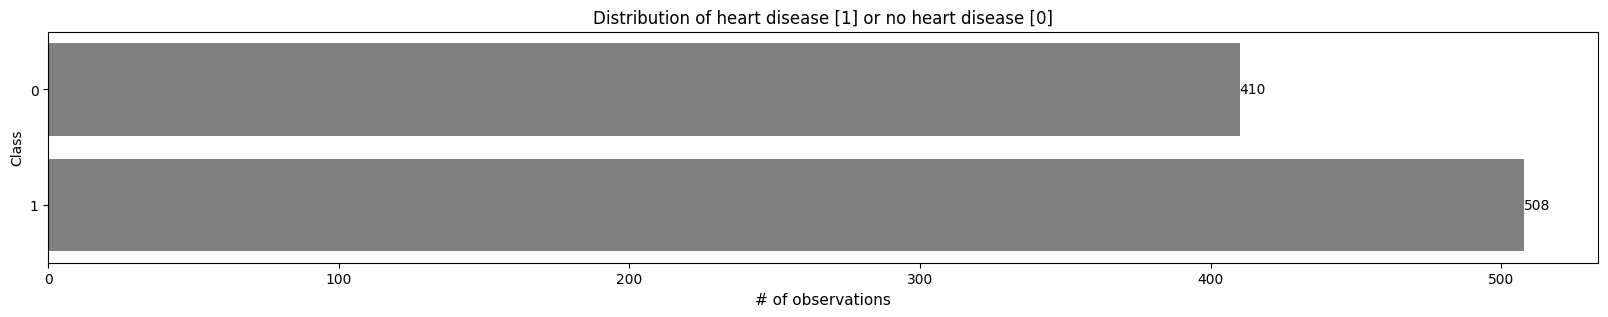

In [7]:
fig, ax = plt.subplots(figsize=(20,3))
sns.countplot(y='HeartDisease', data=df, color='grey', ax=ax)
#Annotation
ax.bar_label(ax.containers[0])
plt.xlabel('# of observations', fontsize=11)
plt.ylabel('Class')
plt.title('Distribution of heart disease [1] or no heart disease [0]')
plt.show()

In [8]:
print(f'Percentage of heart disease [1]: {round(df["HeartDisease"].value_counts()[1]/len(df)*100,2)}%')
print(f'Percentage of No heart disease [0]: {round(df["HeartDisease"].value_counts()[0]/len(df)*100,2)}%')


Percentage of heart disease [1]: 55.34%
Percentage of No heart disease [0]: 44.66%


<Figure size 100x80 with 0 Axes>

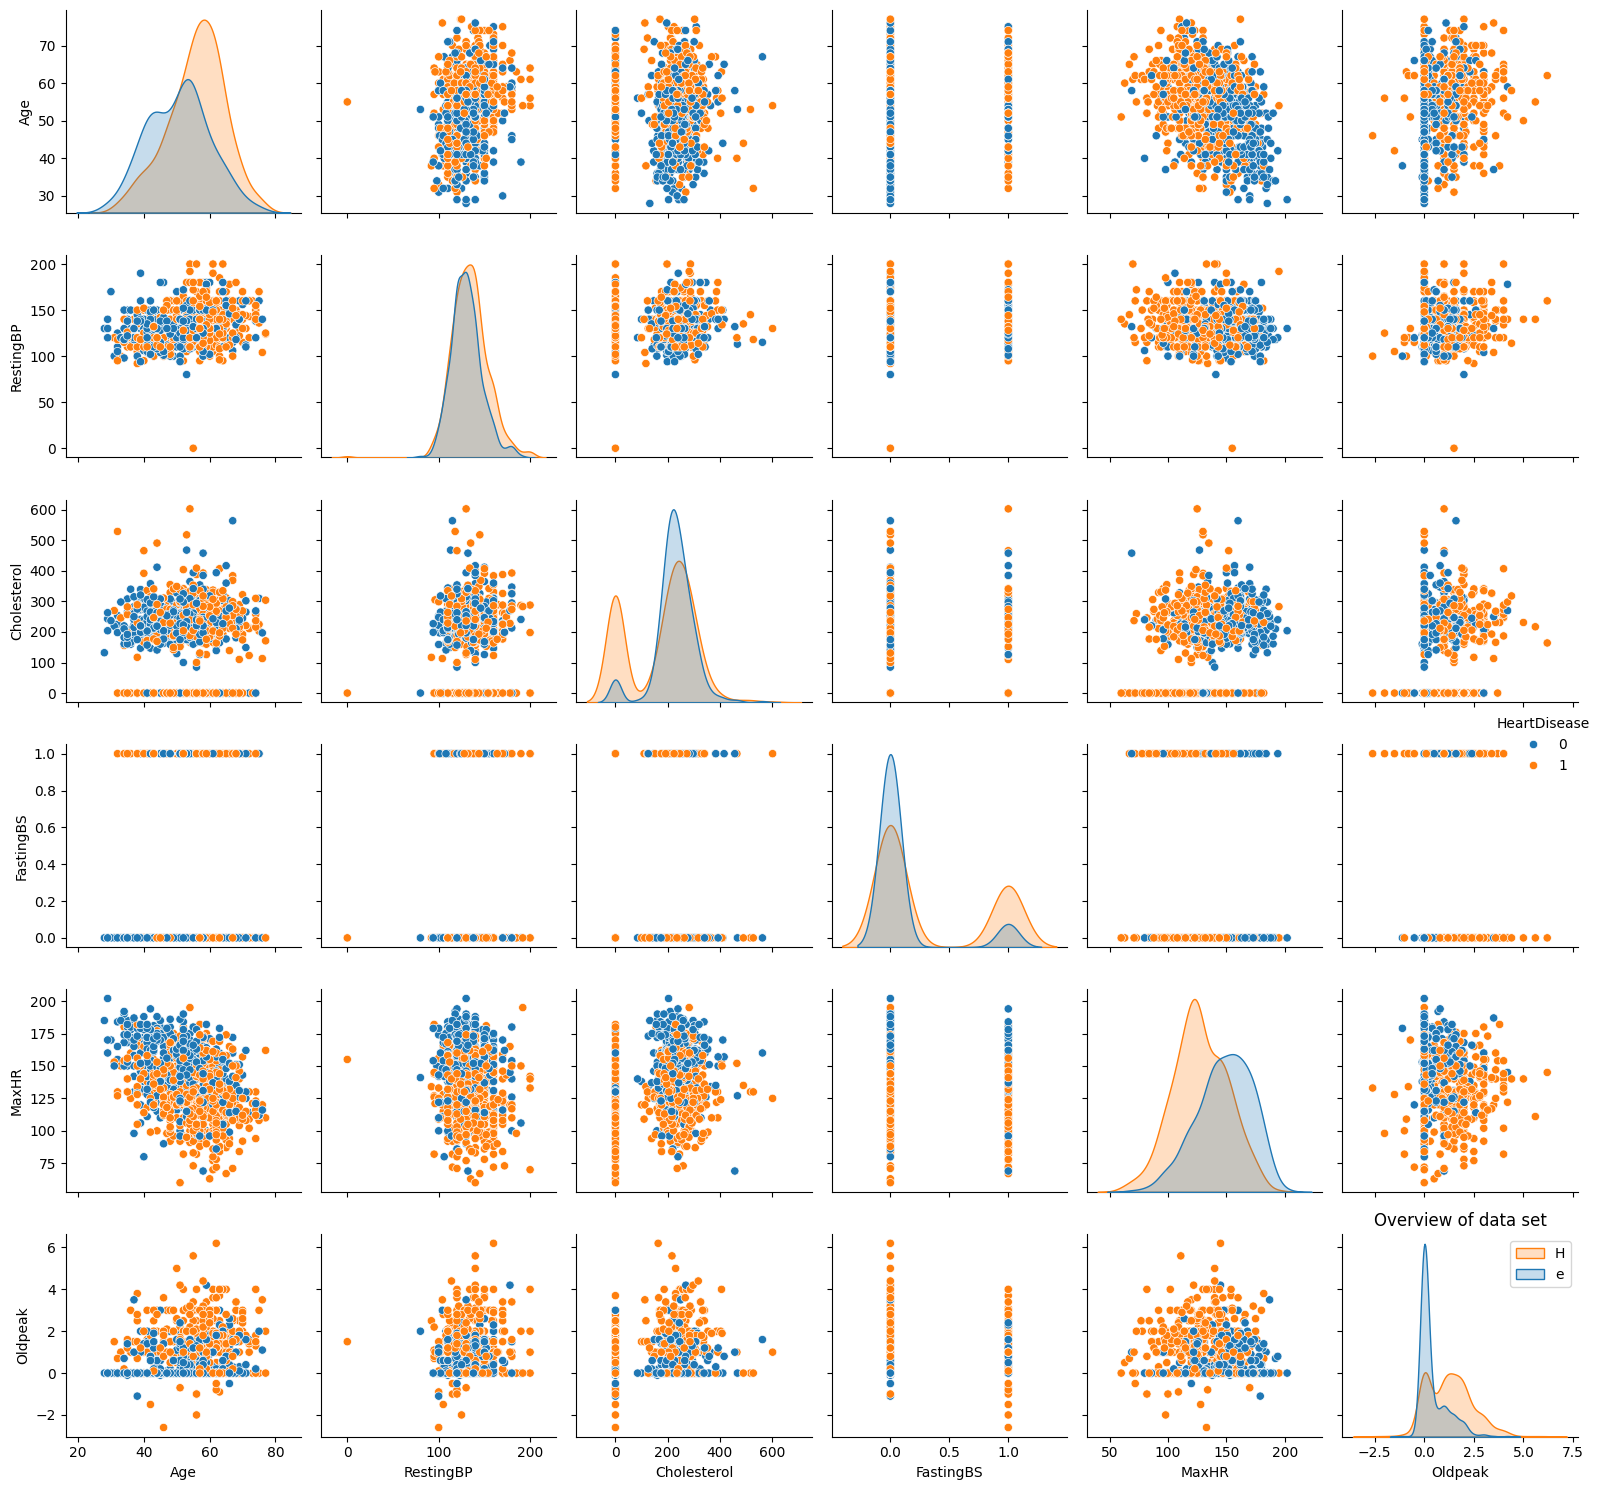

In [9]:
# Pairplot

plt.figure(figsize=(1,.8))
sns.pairplot(df, hue= 'HeartDisease')
plt.title('Overview of data set')
plt.legend('HeartDisease')
plt.tight_layout()
plt.show()



The cholesterol shows a lot of '0'. According to the levels states here https://www.nhs.uk/conditions/high-cholesterol/cholesterol-levels/, '0' seems incorrect or could be a missing value. The discussion on kaggle is also ambivalent. I'm going to replace the '0' with the median.

In [10]:
c_median = df['Cholesterol'].median().astype(int)
print(c_median)
df['Cholesterol'].replace(0, c_median, inplace=True)

223


C:\Users\F12744\AppData\Local\Temp\ipykernel_7896\2432625263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0, c_median, inplace=True)


Correlation

C:\Users\F12744\AppData\Local\Temp\ipykernel_7896\1096219066.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')


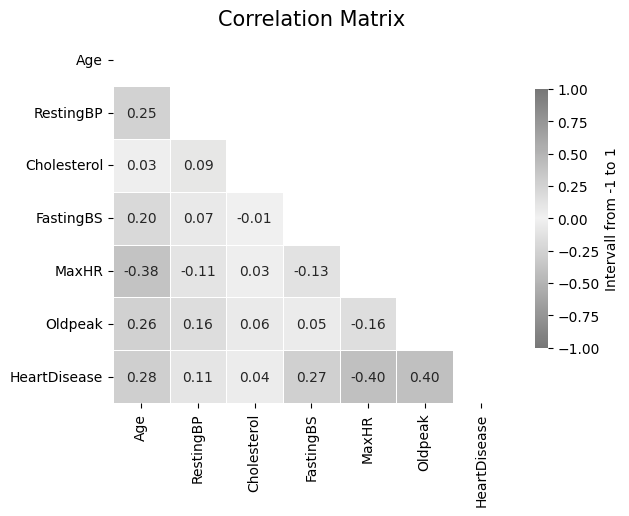

In [11]:
corr = df.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.title('Correlation Matrix', fontsize=15)

cmap = sns.diverging_palette(h_neg=0, h_pos=0, s=0, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 10},
            vmin=-1,vmax=1,center=0,
            linewidths=.5,
            cbar_kws={'label': 'Intervall from -1 to 1', 'shrink':.7})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment= 'right')
plt.show()

The features have positive and negative correlation. HeartDisease has the highest negative correlation with MaxHR and a positive with Oldpeak.

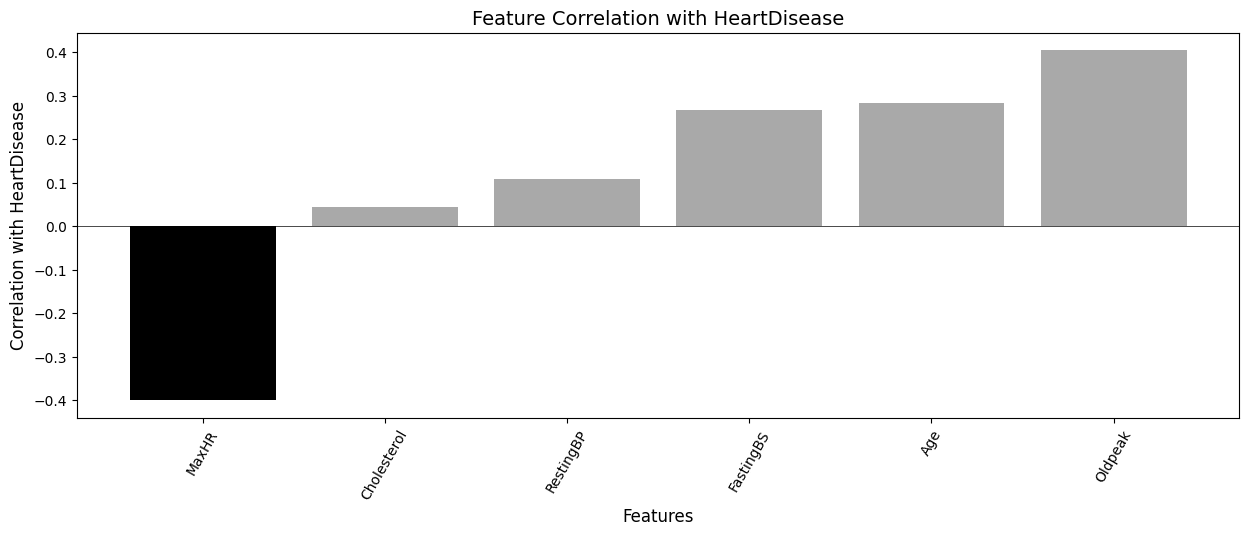

In [12]:
# Only numerical features
features = df.drop(['Sex', 'ChestPainType' ,'ExerciseAngina', 'ST_Slope', 'HeartDisease','RestingECG'], axis=1)
label = df['HeartDisease']

# Calculate the correlation between each feature and the target variable
corr = features.corrwith(label)
sorted_corr = corr.sort_values()

plt.figure(figsize=(15, 5))

# Set colors based on positive and negative correlations
colors = ['darkgrey' if c >= 0 else 'black' for c in sorted_corr]

plt.bar(sorted_corr.index, sorted_corr, color=colors)
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Features', fontsize= 12)
plt.ylabel('Correlation with HeartDisease', fontsize=12)
plt.title('Feature Correlation with HeartDisease', fontsize=14)
plt.xticks(rotation=60)

plt.show()

Distribution of HD per gender

In [13]:
fig = px.histogram(df,
                   x = 'HeartDisease',
                   color = 'Sex',
                   hover_data = df.columns,
                   title = 'Distribution of Heart Disease per gender',
                   text_auto = True,
                   width = 999, height = 400,
                   barmode = 'group')

fig.show()

In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [15]:
fig = px.histogram(df,
                   x = 'Cholesterol',
                   color = 'Sex',
                   hover_data = df.columns,
                   title = 'Distribution of Cholesterol per gender',
                   text_auto = True,
                   width = 999, height = 400,
                   barmode = 'group')

fig.show()

In [16]:
fig = px.histogram(df,
                   x = 'RestingBP',
                   color = 'Sex',
                   hover_data = df.columns,
                   title = 'Distribution of RestingBP per gender',
                   text_auto = True,
                   width = 999, height = 400,
                   barmode = 'group')

fig.show()

In [17]:
fig = px.histogram(df,
                   x = 'ExerciseAngina',
                   color = 'Sex',
                   hover_data = df.columns,
                   title = 'Distribution of ExerciseAngina per gender',
                   text_auto = True,
                   width = 999, height = 400,
                   barmode = 'group')

fig.show()

In [18]:
fig = px.histogram(df,
                   x = 'Age',
                   color = 'Sex',
                   hover_data = df.columns,
                   title = 'Distribution of Age per gender',
                   text_auto = True,
                   width = 999, height = 400,
                   barmode = 'group')

fig.show()

Distribution of ST_Slope

In [19]:
fig=px.histogram(df,
                 x='ST_Slope',
                 hover_data = df.columns,
                 text_auto = True,
                 width = 999, height = 400,
                 title= 'Distribution of Resting ECG')
fig.show()

Outliers

In [20]:
# Only numerical features
df_out = df.drop(['Sex', 'ChestPainType' ,'ExerciseAngina', 'ST_Slope', 'HeartDisease','RestingECG'], axis=1)
fig = px.box(df_out, title = 'Box Plot of numerical features')
fig.update_layout(
    xaxis_title_text='Feature', 
    yaxis_title_text='Value'
)
fig.show()

FastingBS (has only two different values) and Oldpeak (has also negative values) could be excluded from this plot.
I'll keep outliers as they are for now. Depending on the model I will use I'll make some changes.

In [21]:
fig = px.box(df, y='Oldpeak', x='HeartDisease', title = 'Distribution of Oldpeak')
fig.show()

In [22]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   240.581699    0.233115  136.809368   
std      9.432617   18.514154    53.982967    0.423046   25.460334   
min     28.000000    0.000000    85.000000    0.000000   60.000000   
25%     47.000000  120.000000   214.000000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


The mean and median are close together, which is one indicator of a normal distribution.

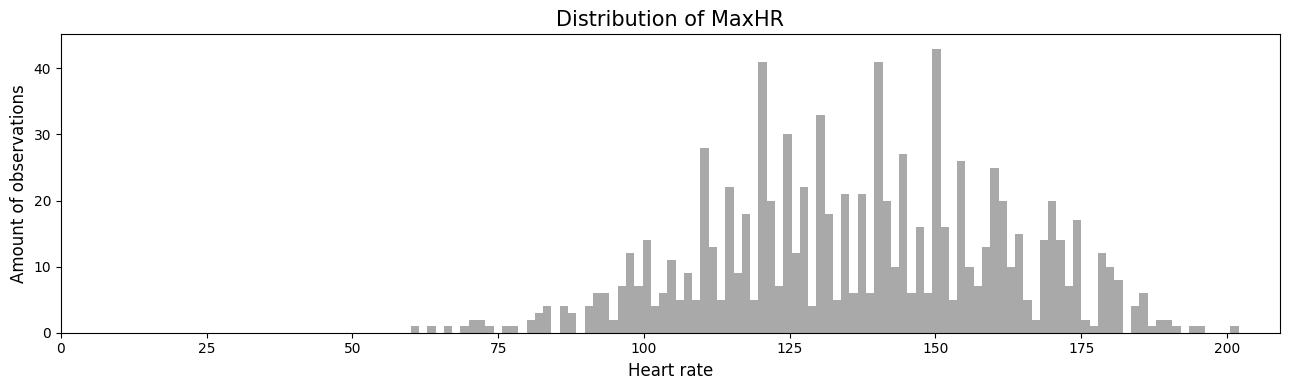

In [23]:
plt.figure(figsize=(13, 4))
plt.hist(df['MaxHR'], color='darkgrey', bins=100)
plt.title('Distribution of MaxHR', fontsize=15)
plt.xlabel('Heart rate', fontsize=12)
plt.ylabel('Amount of observations', fontsize=12)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

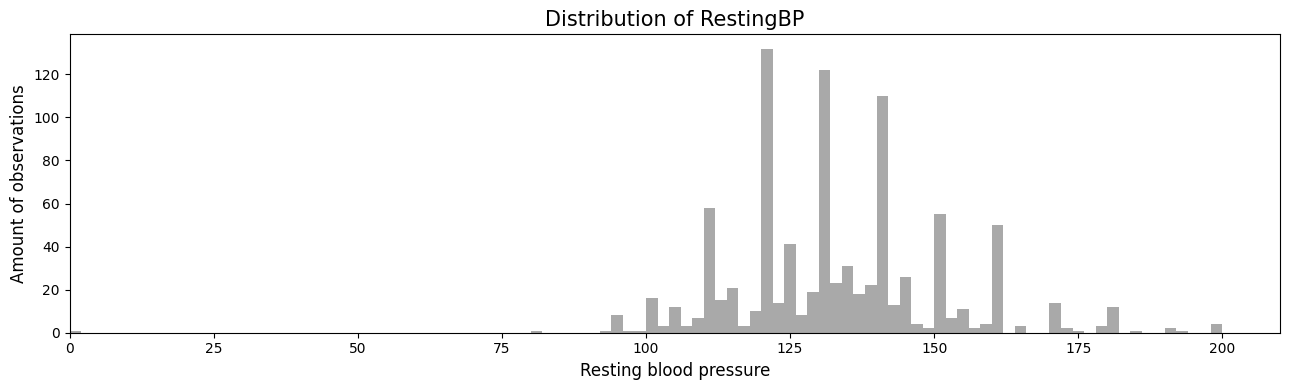

In [24]:
plt.figure(figsize=(13, 4))
plt.hist(df['RestingBP'], color='darkgrey', bins=100)
plt.title('Distribution of RestingBP', fontsize=15)
plt.xlabel('Resting blood pressure', fontsize=12)
plt.ylabel('Amount of observations', fontsize=12)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

In [25]:
fig = px.histogram(df, x="Age", nbins=50)
fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='Age', 
    yaxis_title_text='Amount of observations'
)
fig.show()

In [29]:
# Save manipulated data set to csv
df.to_csv('heart_after_EDA.csv', index=False)